# Introduccion

Hoy vamos a ver una introduccion a los modelos de ML. La idea no es focalizarse en los modelos en si sino en la logica y la funcion que cumplen. En esta clase vamos a pasar por alto los detalles (y un poco las buenas practicas) para focalizarnos en las ideas que queremos presentar.

In [12]:
# vamos a usar una lista reducida de especies del arbolado de la ciudad que la extrajimos en una notebook aparte

import pandas as pd

arbolado = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arbolado.head()

C:\Users\Ionatan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [14]:
lista_especies = ["Photinia x fraseri", "Populus nigra","Cupressus sp."]


In [15]:
# vamos a usar solo algunas caracteristicas

data = arbolado[arbolado["nombre_cientifico"].isin(lista_especies)]
data = data[["long","lat","nombre_cientifico","diametro_altura_pecho","altura_arbol"]]

In [16]:
data

,long,lat,nombre_cientifico,diametro_altura_pecho,altura_arbol
121,-58.379340,-34.606517,Photinia x fraseri,13.0,5.0
125,-58.379330,-34.606782,Photinia x fraseri,7.0,4.0
126,-58.379353,-34.606189,Photinia x fraseri,9.0,5.0
133,-58.379353,-34.606189,Photinia x fraseri,12.0,4.0
137,-58.379353,-34.606189,Photinia x fraseri,8.0,3.0
...,...,...,...,...,...
358421,NaN,NaN,Populus nigra,32.0,9.0
360378,NaN,NaN,Photinia x fraseri,40.0,4.0
363281,NaN,NaN,Photinia x fraseri,25.0,6.0
364535,NaN,NaN,Cupressus sp.,67.0,14.0


In [17]:
import seaborn as sns

<AxesSubplot:xlabel='diametro_altura_pecho', ylabel='altura_arbol'>

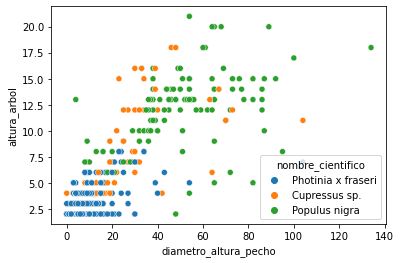

In [18]:
# Veamos que pasa con la relacion entre la altura y los diametros

sns.scatterplot(data = data, x="diametro_altura_pecho", y="altura_arbol", hue="nombre_cientifico")


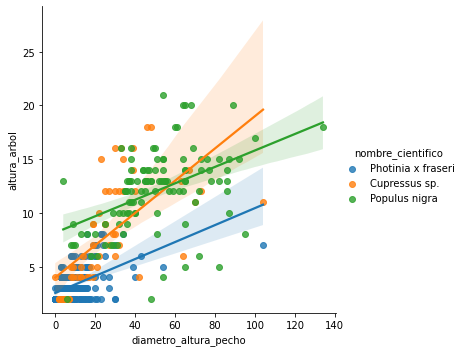

In [19]:
# veamos si podemos identificar las tendencias

sns.lmplot(data = data, x="diametro_altura_pecho", y="altura_arbol", hue="nombre_cientifico")

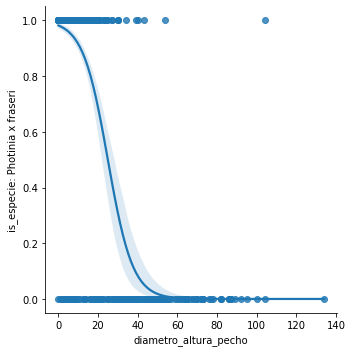

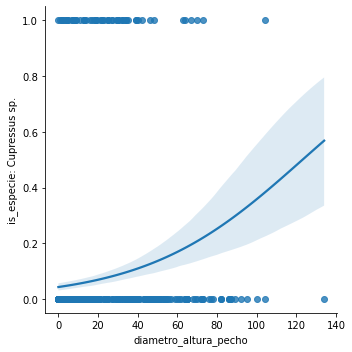

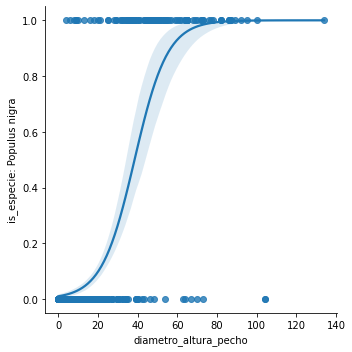

In [32]:
# Veamos ahora como funciona un modelo de regresion logistica 

for especie in data["nombre_cientifico"].unique():
    nombre = "is_especie: " + especie
    data[nombre] = data["nombre_cientifico"] == especie
    sns.lmplot(data = data, x="diametro_altura_pecho", y = nombre, logistic=True)

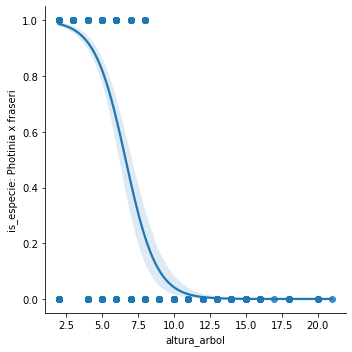

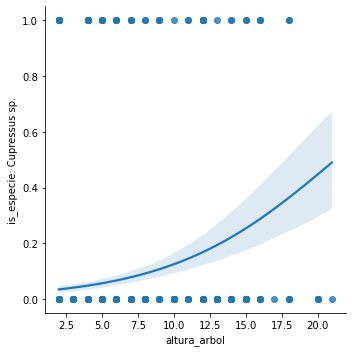

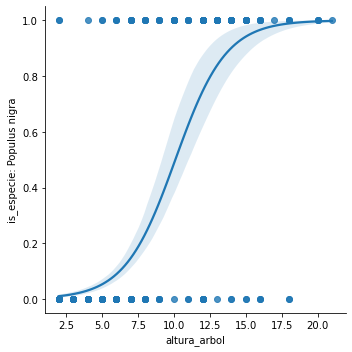

In [33]:
# Veamos ahora como funciona un modelo de regresion logistica 

for especie in data["nombre_cientifico"].unique():
    nombre = "is_especie: " + especie
    data[nombre] = data["nombre_cientifico"] == especie
    sns.lmplot(data = data, x="altura_arbol", y = nombre, logistic=True)